In [1]:
import pandas as pd
import altair as alt

In [2]:
df = pd.read_csv('/Users/choupei-hsuan/Desktop/UW MSTI/510/Wk5_visualization/penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
# Get the first row and convert it to a dictionary
# Look at the vertical way when too many columns
df.iloc[0].to_dict()

{'species': 'Adelie',
 'island': 'Torgersen',
 'culmen_length_mm': 39.1,
 'culmen_depth_mm': 18.7,
 'flipper_length_mm': 181.0,
 'body_mass_g': 3750.0,
 'sex': 'MALE'}

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.value_counts('sex')

sex
MALE      168
FEMALE    165
.           1
dtype: int64

In [8]:
# Find a weird value in 'sex', do data cleaning
# Directly find the 'sex' is ., then list them all out
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [10]:
# Change the weird line into the correct value
df.loc[336, 'sex'] = "FEMALE"
df.value_counts('sex')

sex
MALE      168
FEMALE    166
dtype: int64

<AxesSubplot:ylabel='None'>

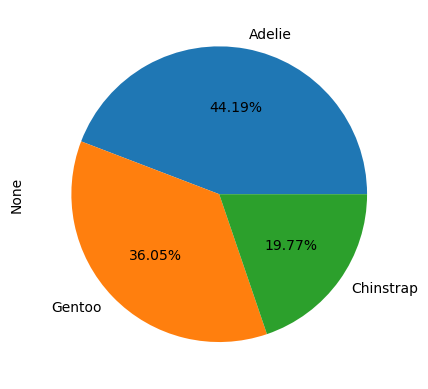

In [11]:
df.value_counts('species').plot(kind='pie',autopct="%.2f%%")

### **Alt**

In [15]:
(
    alt
    .Chart(df)
    .mark_bar()
    .encode(
        x='count()',
        y=alt.Y('species', sort='-x'),
        color='species'
    )
    .properties(
        width=400,
        height=200
    )
    .interactive()
)

alt.Chart(...)

In [12]:
alt.Chart(df).mark_bar().encode(
    x='count()',
    y=alt.Y('species', sort='-x'),
    color='species'
)


alt.Chart(...)

In [16]:
alt.Chart(df).mark_point().encode(
    x='culmen_length_mm',
    y='culmen_depth_mm',
    color='species',
    tooltip = ['species', 'culmen_length_mm', 'culmen_depth_mm'] #information when hover
).interactive()

alt.Chart(...)

In [19]:
# change the color configuration
alt.Chart(df).mark_point(color = 'black').encode(
    x='culmen_length_mm',
    y='culmen_depth_mm',
    # color='species',
    # tooltip = ['species', 'culmen_length_mm', 'culmen_depth_mm'] #information when hover
).interactive()

alt.Chart(...)

In [25]:
# Bar Chart
alt.Chart(df).mark_bar().encode(
    x=alt.X('culmen_length_mm', bin=True),
    y='count()',
    color='species'
)


alt.Chart(...)